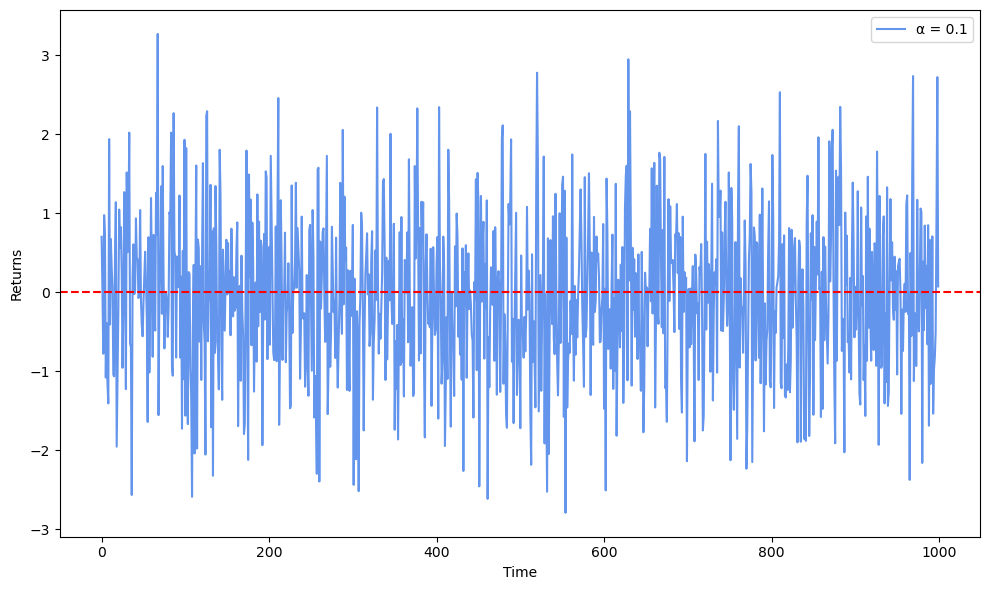

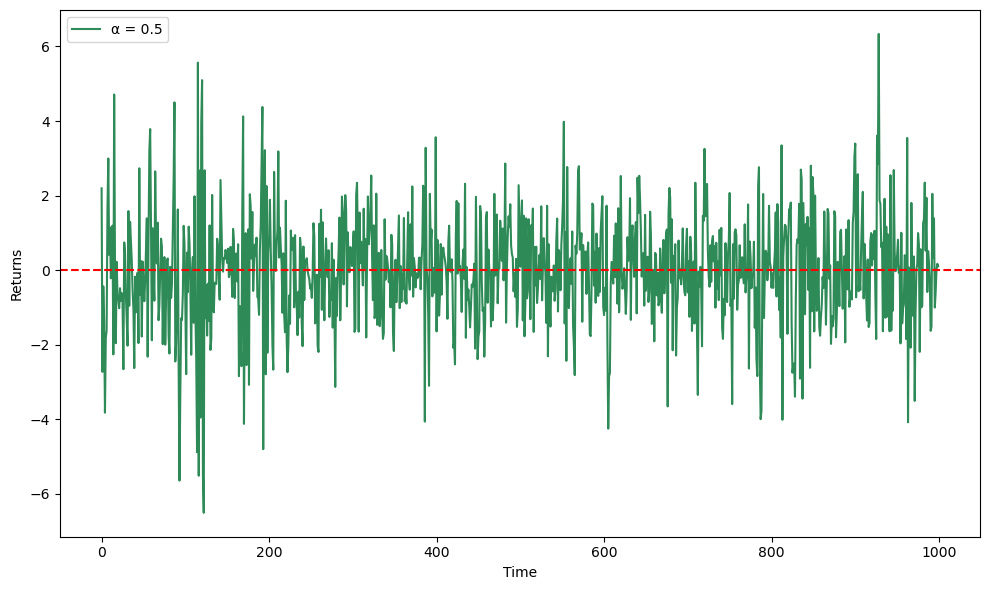

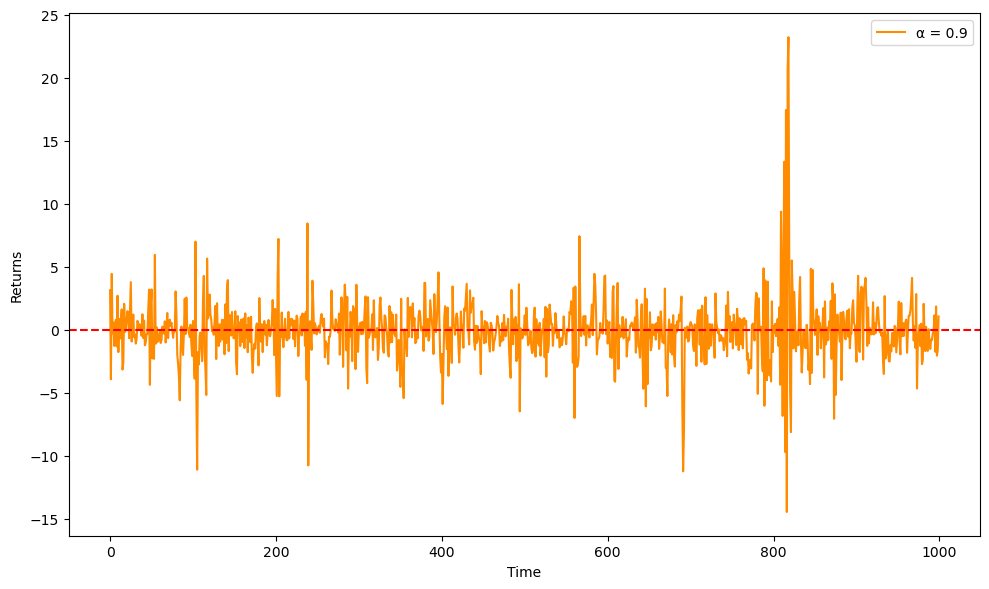

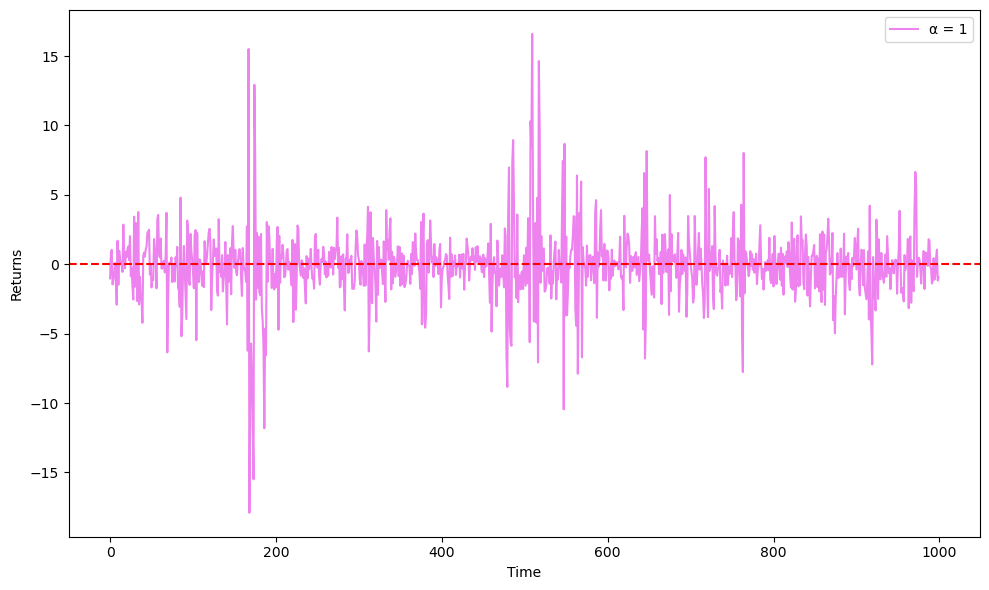

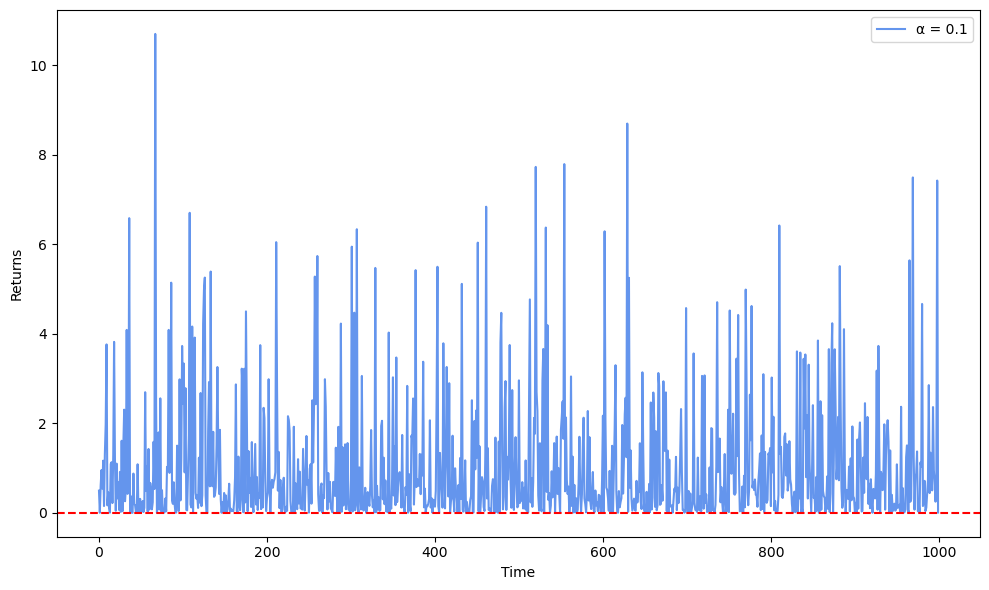

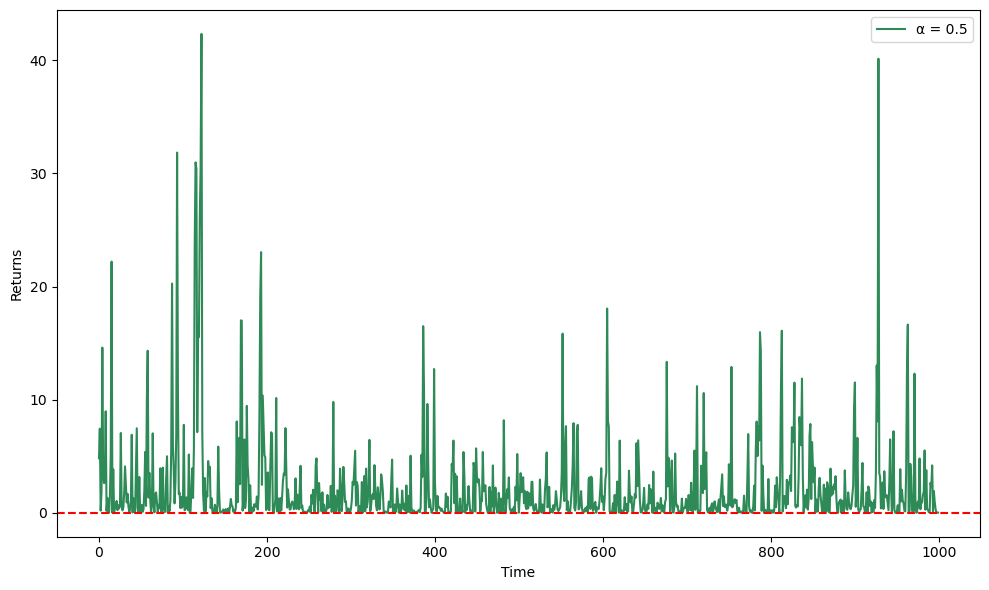

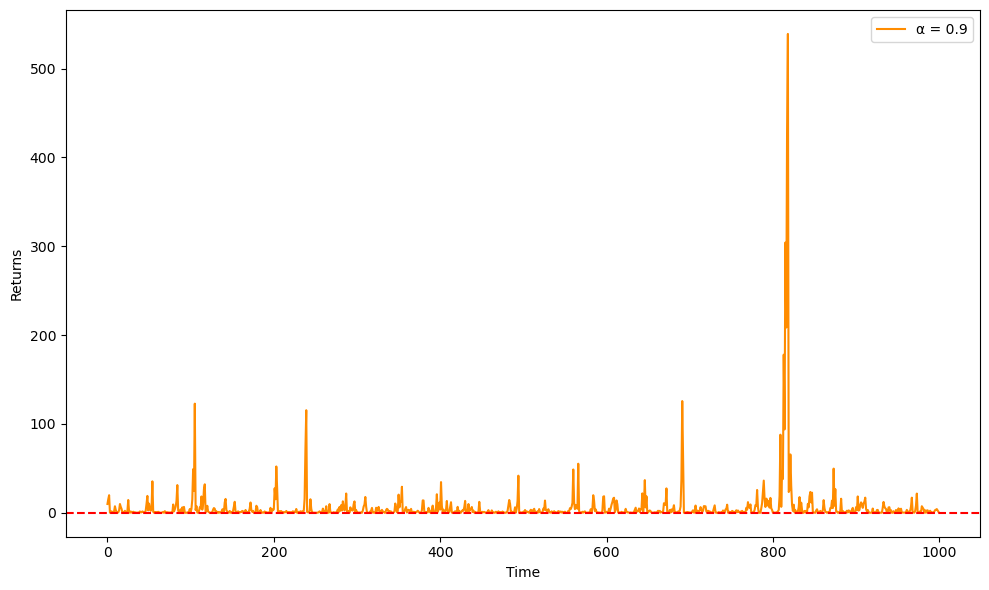

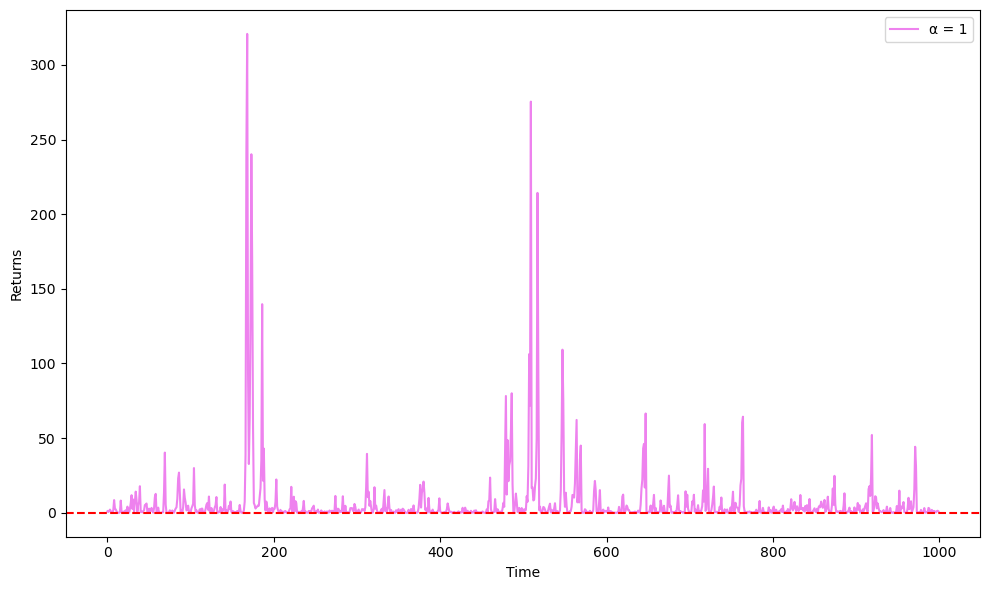

α = 0.1
  Mean           : -0.0628
  Variance       : 1.0137
  Skewness       : 0.0675
  4th Moment     : 2.9804
  Kurtosis       : 2.8936
  ------------------------------
α = 0.5
  Mean           : -0.0153
  Variance       : 2.1975
  Skewness       : -0.1191
  4th Moment     : 21.7134
  Kurtosis       : 4.4911
  ------------------------------
α = 0.9
  Mean           : -0.0739
  Variance       : 6.0755
  Skewness       : 1.4277
  4th Moment     : 775.8129
  Kurtosis       : 21.1836
  ------------------------------
α = 1
  Mean           : -0.0739
  Variance       : 6.6964
  Skewness       : 0.1173
  4th Moment     : 566.6301
  Kurtosis       : 12.6447
  ------------------------------


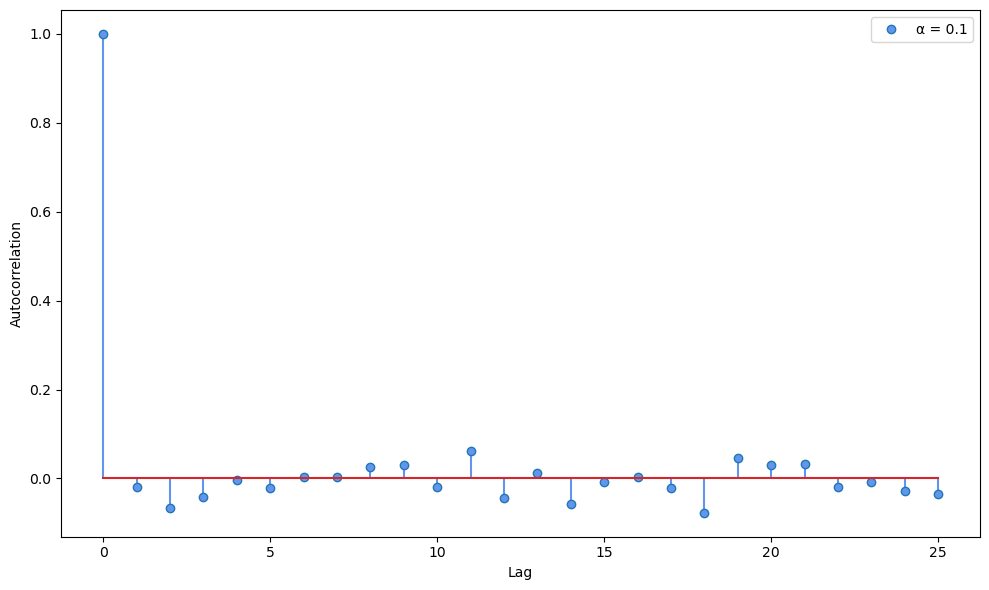

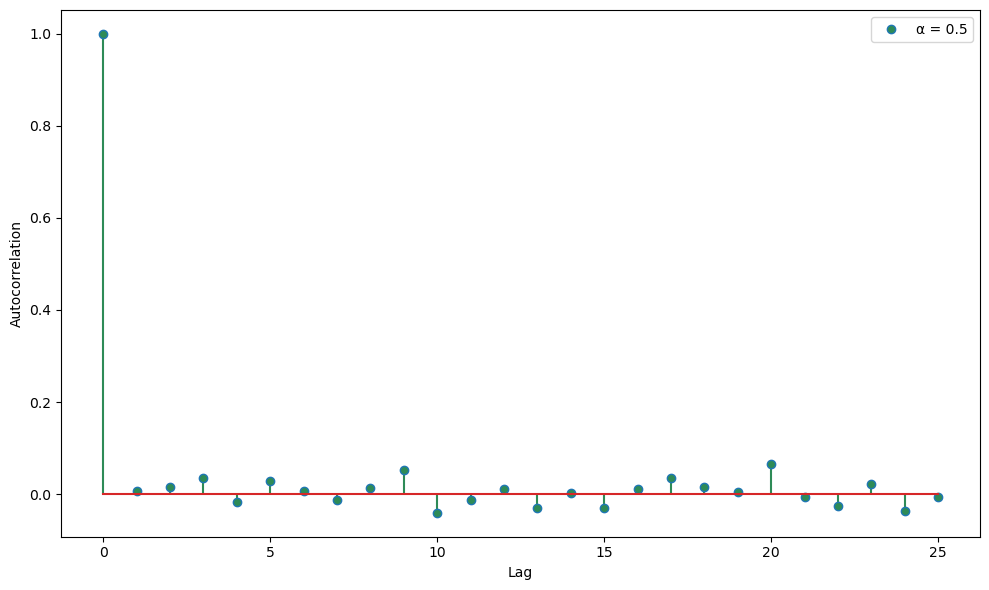

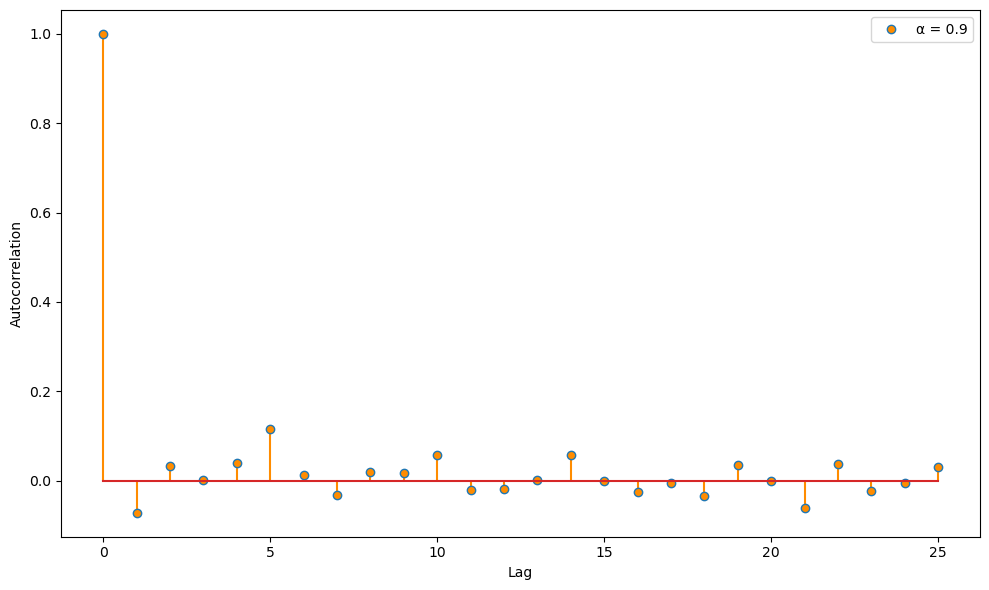

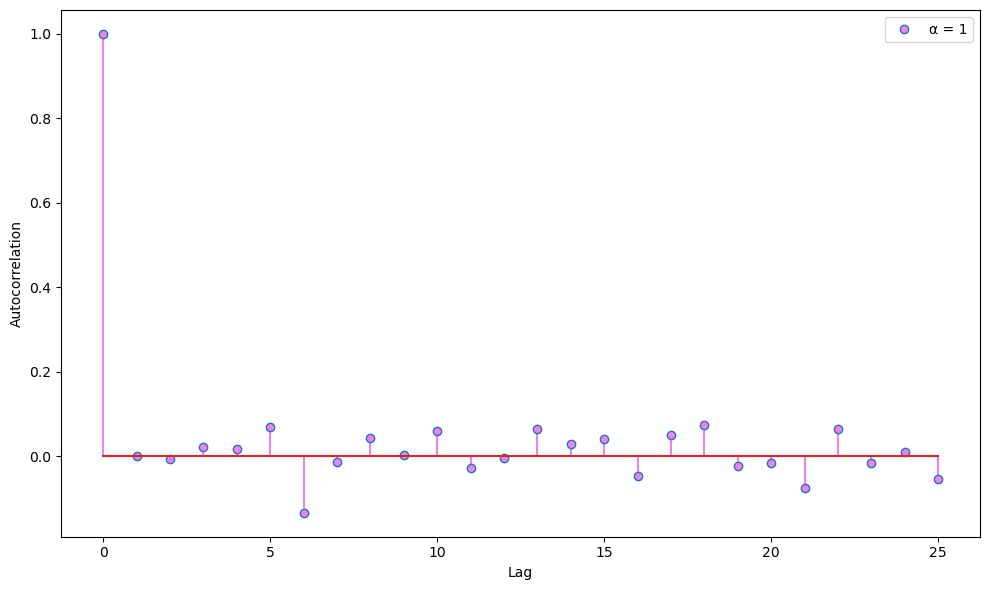

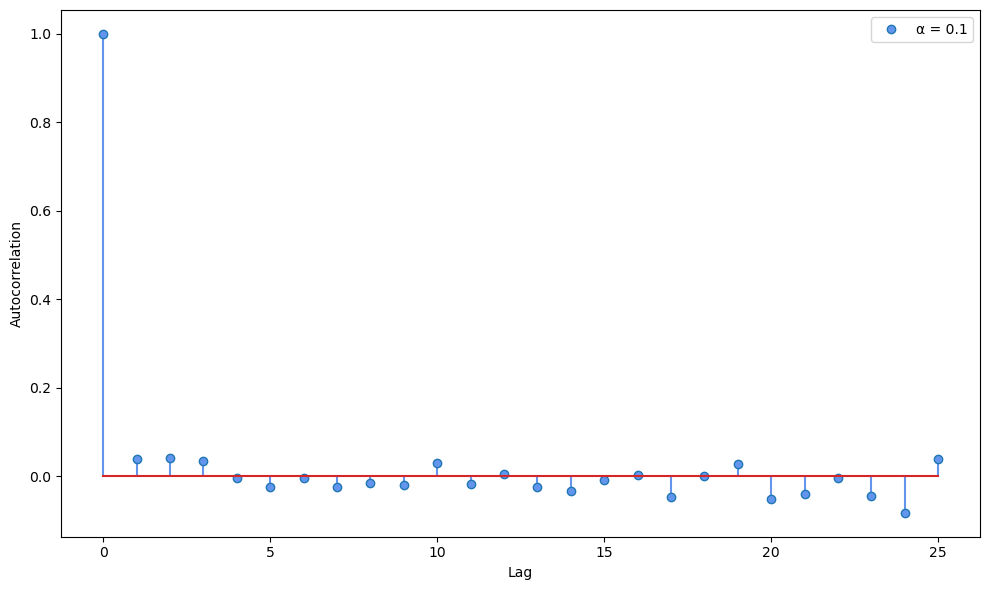

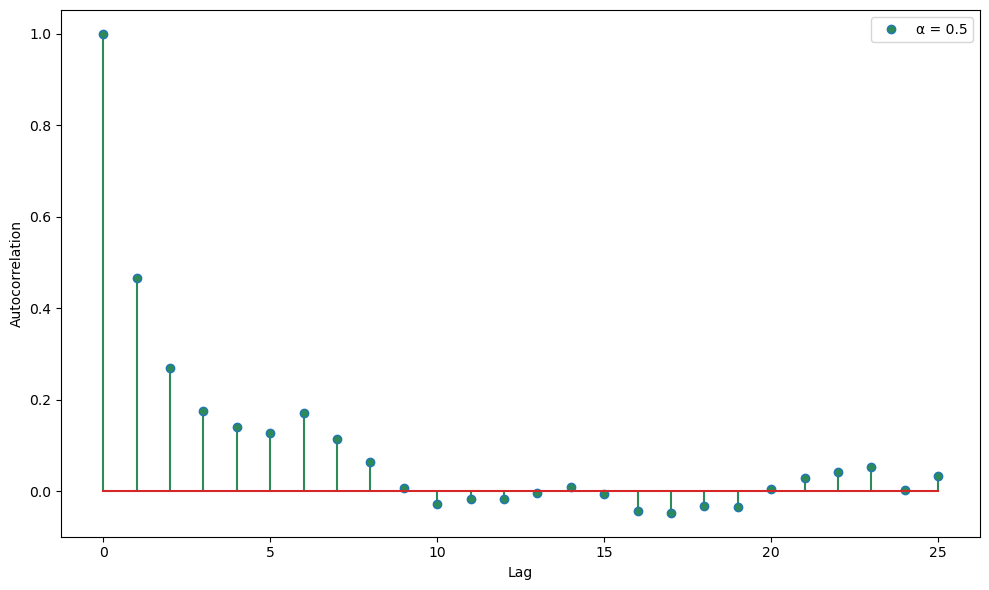

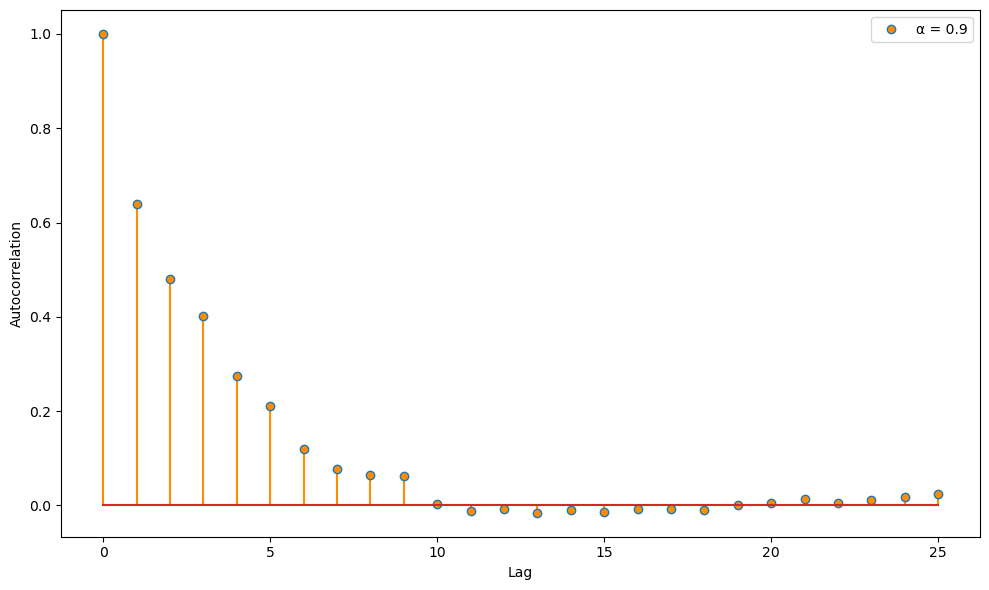

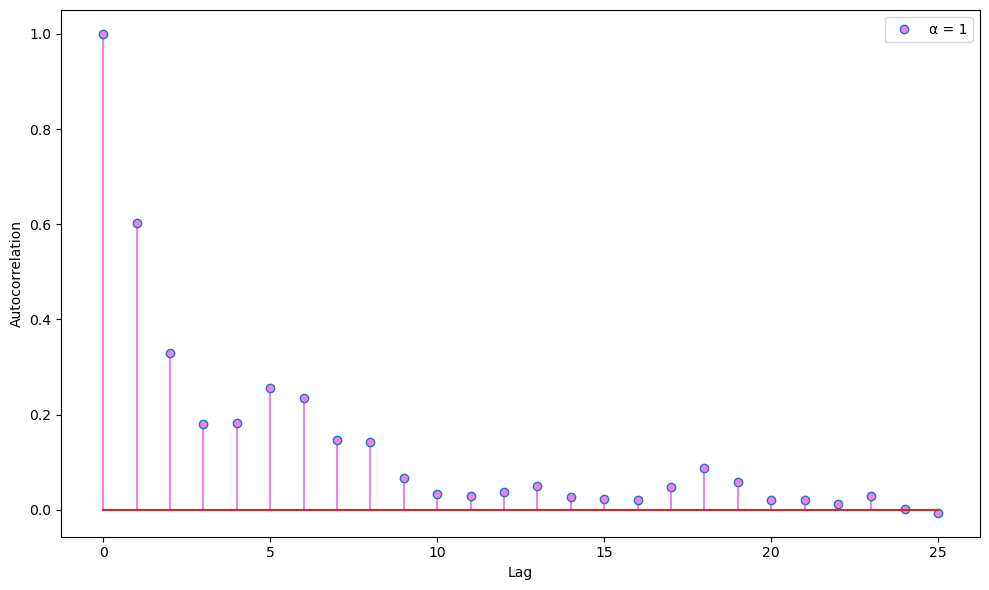

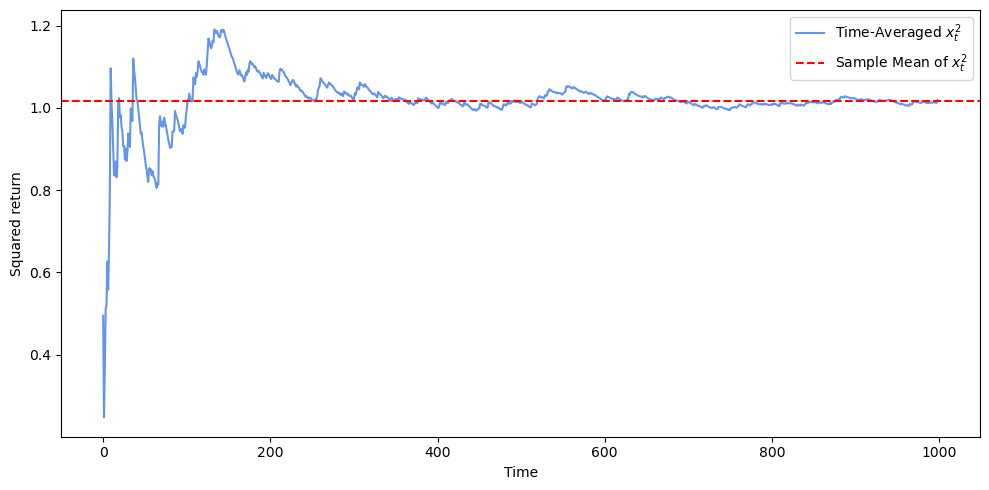

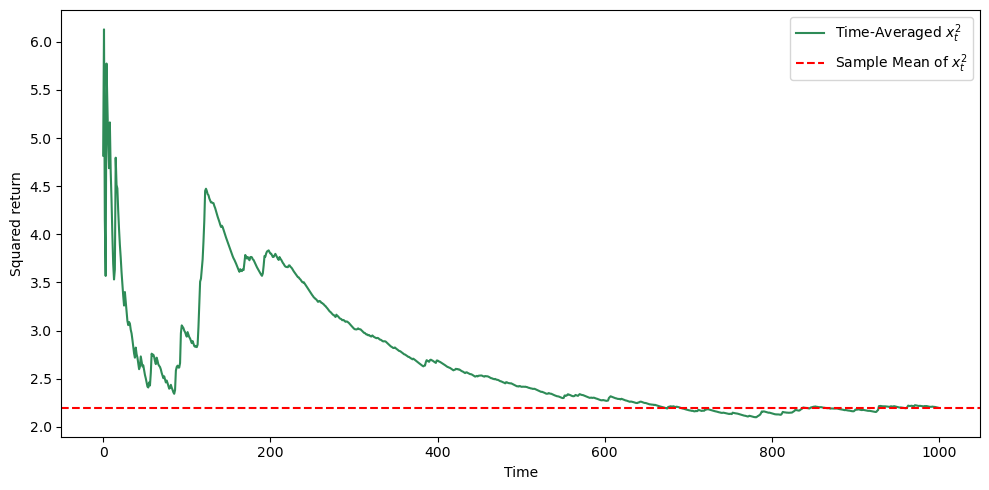

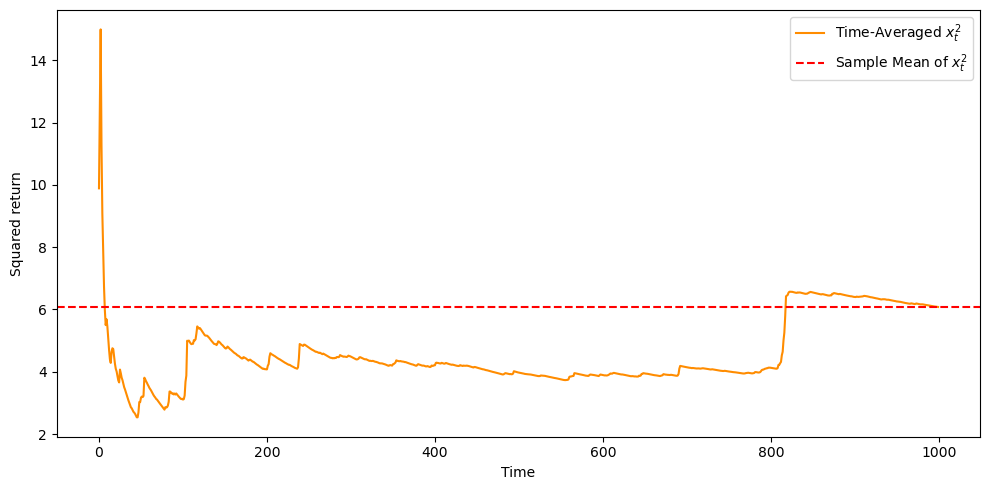

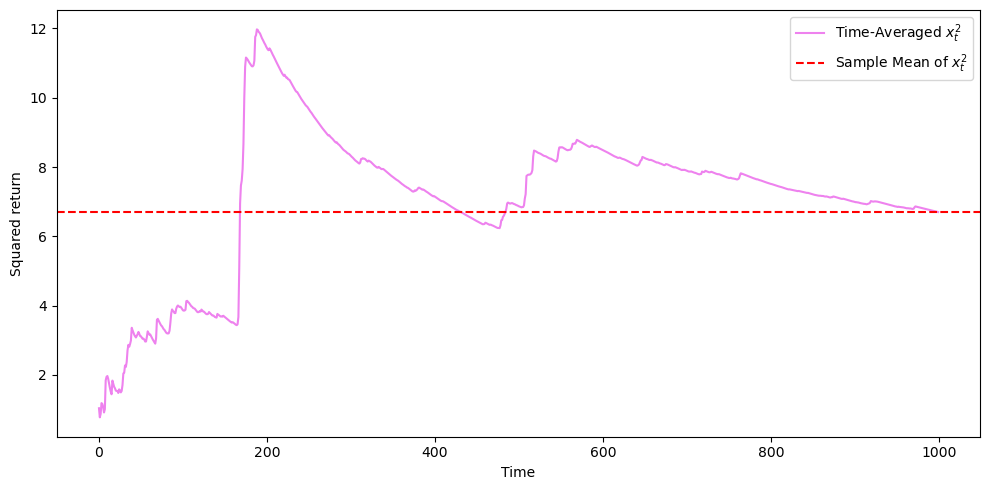

In [ ]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt


np.random.seed(23)
#4326, 43236

def simulate_arch_data(T, omega, alpha):
    x = np.zeros(T)
    sigma2 = np.zeros(T)
    if alpha < 1:
        sigma2[0] = omega / (1 - alpha)  # use unconditional variance
    else:
        sigma2[0] = omega
    z=np.random.normal(size=T)
    x[0] = np.sqrt(sigma2[0]) *z[0]
    
    for t in range(1, T):
        sigma2[t] = omega + alpha * x[t-1]**2
        x[t] = np.sqrt(sigma2[t]) * z[t]
    
    return x

# Parameters
omega = 1
T = 1000
alphas = [0.1, 0.5, 0.9,1]
data = {alpha: simulate_arch_data(T, omega, alpha) for alpha in alphas}


#Returns
colors = ['cornflowerblue', 'seagreen', 'darkorange', 'violet']
for alpha, color in zip(alphas, colors):
    plt.figure(figsize=(10, 6))
    plt.plot(data[alpha], label=f'α = {alpha}', color=color)
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

#Squared returns
for alpha, color in zip(alphas, colors):
    plt.figure(figsize=(10, 6))
    plt.plot(data[alpha]**2, label=f'α = {alpha}', color=color)
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

#Moments
for alpha in alphas:
    x = data[alpha]
    m = np.mean(x)
    m2 = np.var(x)
    m3 = skew(x)
    m4 = np.mean(x**4)
    k = kurtosis(x, fisher=False)  # normal = 3

    print(f"α = {alpha}")
    print(f"  Mean           : {m:.4f}")
    print(f"  Variance       : {m2:.4f}")
    print(f"  Skewness       : {m3:.4f}")
    print(f"  4th Moment     : {m4:.4f}")
    print(f"  Kurtosis       : {k:.4f}")
    print(f"  ------------------------------")

#ACF, Autocorrelations in returns
for alpha, color in zip(alphas, colors):
    acf_vals_x = acf(data[alpha], nlags=25, fft=False)

    plt.figure(figsize=(10, 6))
    markerline, stemlines, baseline = plt.stem(range(len(acf_vals_x)), acf_vals_x)
    plt.setp(markerline, 'markerfacecolor', color, 'label', f'α = {alpha}')
    plt.setp(stemlines, 'color', color)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.tight_layout()
    plt.show()


#ACF, Autocorrelations in squared returns
for alpha, color in zip(alphas, colors):
    acf_vals_x = acf(data[alpha]**2, nlags=25, fft=False)
    plt.figure(figsize=(10, 6))
    markerline, stemlines, baseline = plt.stem(range(len(acf_vals_x)), acf_vals_x)
    plt.setp(markerline, 'markerfacecolor', color, 'label', f'α = {alpha}')
    plt.setp(stemlines, 'color', color)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.tight_layout()
    plt.show()

#Ergodic
for alpha, color in zip(alphas, colors):
    x = data[alpha]
    T = len(x)
    time_avg_sq = np.cumsum(x**2) / np.arange(1, T+1)
    ensemble_sq = np.mean(x**2)

    plt.figure(figsize=(10, 5))
    plt.plot(time_avg_sq, label="Time-Averaged $x_t^2$", color=color)
    plt.axhline(y=ensemble_sq, color='red', linestyle="--", label="Sample Mean of $x_t^2$")
    plt.xlabel("Time")
    plt.ylabel("Squared return")
    plt.legend()
    plt.tight_layout()
    plt.show()

